# EDA and process to Model Selection

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
from sklearn.preprocessing import StandardScaler


In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

In [19]:
file_path = Path("/Users/roybensimon/Desktop/data/train.parquet")
train_data = pd.read_parquet(file_path)
train_data

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.85,2.38,0.00
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.85,2.38,0.69
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.85,2.38,0.00
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.85,2.38,1.61
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.85,2.38,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...
929175,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,445.0,2021-09-09 06:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.84,2.30,6.10
929178,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,145.0,2021-09-09 10:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.84,2.30,4.98
929181,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,218.0,2021-09-09 15:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.84,2.30,5.39
929184,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,21.0,2021-09-09 22:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.84,2.30,3.09


In [20]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

Je verifie si il y'a des valeurs manquantes:

In [21]:
print(train_data.isnull().sum())

counter_id                   0
counter_name                 0
site_id                      0
site_name                    0
bike_count                   0
date                         0
counter_installation_date    0
coordinates                  0
counter_technical_id         0
latitude                     0
longitude                    0
log_bike_count               0
dtype: int64


In [22]:
print(train_data.describe())

        site_id  bike_count                        date  \
count  4.97e+05   496827.00                      496827   
mean   1.05e+08       60.19  2021-03-08 07:25:59.668858   
min    1.00e+08        0.00         2020-09-01 01:00:00   
25%    1.00e+08        5.00         2020-12-05 22:00:00   
50%    1.00e+08       29.00         2021-03-08 11:00:00   
75%    1.00e+08       79.00         2021-06-09 14:00:00   
max    3.00e+08     1302.00         2021-09-09 23:00:00   
std    3.21e+07       87.59                         NaN   

        counter_installation_date   latitude  longitude  log_bike_count  
count                      496827  496827.00  496827.00       496827.00  
mean   2019-04-04 07:24:35.245911      48.85       2.35            3.08  
min           2013-01-18 00:00:00      48.83       2.27            0.00  
25%           2018-11-29 00:00:00      48.84       2.31            1.79  
50%           2019-11-06 00:00:00      48.85       2.35            3.40  
75%           2019-12-11

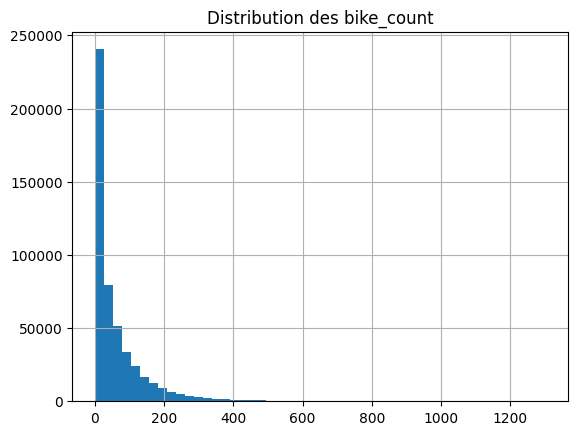

In [23]:
import matplotlib.pyplot as plt

train_data['bike_count'].hist(bins=50)
plt.title("Distribution des bike_count")
plt.show()

On regarde si le nb de velos varie selon le jour, le mois, l'heure

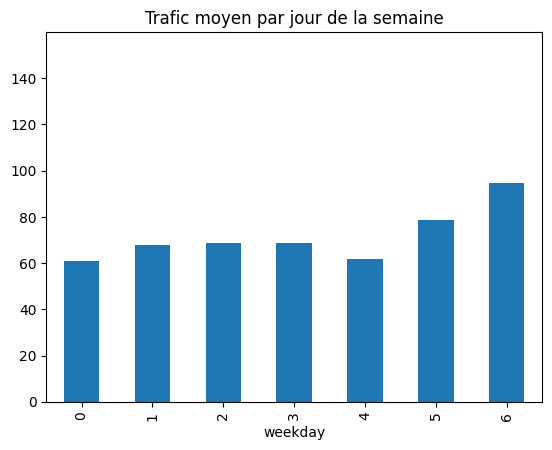

In [28]:
train_data['hour'] = train_data['date'].dt.hour
train_data['month'] = train_data['date'].dt.month
train_data['weekday'] = train_data['date'].dt.weekday

train_data.groupby('hour')['bike_count'].mean().plot(kind='bar')
plt.title("Trafic moyen par heure")
train_data.groupby('month')['bike_count'].mean().plot(kind='bar')
plt.title("Trafic moyen par Mois")
train_data.groupby('weekday')['bike_count'].mean().plot(kind='bar')
plt.title("Trafic moyen par jour de la semaine")
plt.show()


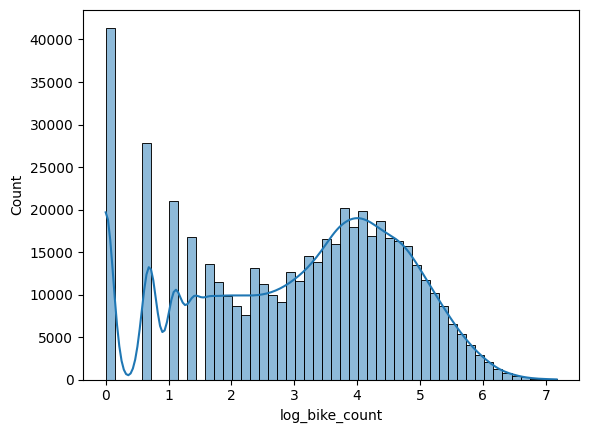

In [30]:
import seaborn as sns


ax = sns.histplot(train_data, x="log_bike_count", kde=True, bins=50)

Donnée externe

In [71]:
file_path = Path("/Users/roybensimon/Desktop/data/external_data.csv")
df_ext = pd.read_csv(file_path, parse_dates=["date"])

In [72]:
df_ext

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
0,7149,2021-01-01 00:00:00,100810,80,1,270,1.8,272.75,272.15,96,...,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7149,2021-01-01 03:00:00,100920,110,3,300,1.7,271.25,270.95,98,...,1500.0,2.0,3.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,7149,2021-01-01 06:00:00,100950,30,3,290,2.6,271.95,271.65,98,...,480.0,4.0,6.0,2000.0,6.0,3.0,3000.0,NaN,NaN,NaN
3,7149,2021-01-01 09:00:00,101100,150,2,280,1.7,272.45,272.05,97,...,1740.0,3.0,3.0,2800.0,NaN,NaN,NaN,NaN,NaN,NaN
4,7149,2021-01-01 12:00:00,101110,30,0,50,1.0,276.95,274.15,82,...,330.0,4.0,6.0,570.0,7.0,6.0,810.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,7149,2020-09-30 09:00:00,101540,-30,8,230,4.4,289.95,286.85,82,...,400.0,7.0,6.0,2200.0,NaN,NaN,NaN,NaN,NaN,NaN
3318,7149,2020-09-30 12:00:00,101320,-210,8,190,4.9,292.05,285.55,66,...,870.0,7.0,6.0,1900.0,NaN,NaN,NaN,NaN,NaN,NaN
3319,7149,2020-09-30 15:00:00,101140,-180,7,190,4.1,291.55,286.45,72,...,820.0,7.0,6.0,2200.0,NaN,NaN,NaN,NaN,NaN,NaN
3320,7149,2020-09-30 18:00:00,101020,-130,6,190,2.7,290.15,285.25,73,...,2160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
columns_to_drop = [
    'counter_id', 
    'site_id', 
    'counter_installation_date', 
    'counter_technical_id', 
    'latitude', 
    'longitude', 
    'coordinates', 
    'bike_count'
]



In [74]:
np.unique(df_ext["numer_sta"])

array([7149])

In [75]:
df_ext[df_ext.duplicated() == True]

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
2018,7149,2020-11-20 18:00:00,103650,20,2,180,1.0,278.15,276.45,89,...,7000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df_ext = df_ext.drop_duplicates()

In [77]:
print(df_ext.isnull().sum()[df_ext.isnull().sum() > 0])
print(
    f"there are {df_ext.isnull().sum()[df_ext.isnull().sum()>0].shape[0]} columns with at least 1 missing values "
)

w1              7
w2             10
n             156
nbas            5
hbas          453
cl            413
cm           1381
ch           1644
niv_bar      3321
geop         3321
tend24         10
tn12         2492
tn24         3321
tx12         2492
tx24         3321
tminsol      3320
sw           3321
tw           3321
raf10          10
etat_sol       52
ht_neige       49
ssfrai        445
perssfrai     445
rr1             9
rr3             6
rr6            16
rr12           22
rr24           24
phenspe1     3321
phenspe2     3321
phenspe3     3321
phenspe4     3321
nnuage1       449
ctype1        798
hnuage1       455
nnuage2      1626
ctype2       1878
hnuage2      1626
nnuage3      2703
ctype3       2851
hnuage3      2703
nnuage4      3279
ctype4       3234
hnuage4      3279
dtype: int64
there are 44 columns with at least 1 missing values 


In [78]:
n_rows = df_ext.shape[0]

columns_to_drop = (df_ext.isnull().sum() / n_rows)[
    (df_ext.isnull().sum() / n_rows) > 0.1
].index

df_ext = df_ext.drop(columns=columns_to_drop)

In [61]:
# df_merge_ext[df_merge_ext.isnull().sum()>0]
col_with_miss_values = df_ext.isnull().sum()[df_ext.isnull().sum() > 0].index
print(col_with_miss_values)

Index(['w1', 'w2', 'n', 'nbas', 'tend24', 'raf10', 'etat_sol', 'ht_neige',
       'rr1', 'rr3', 'rr6', 'rr12', 'rr24'],
      dtype='object')


In [79]:
df_ext.isnull().sum()[df_ext.isnull().sum() > 0]

w1            7
w2           10
n           156
nbas          5
tend24       10
raf10        10
etat_sol     52
ht_neige     49
rr1           9
rr3           6
rr6          16
rr12         22
rr24         24
dtype: int64

In [80]:
linear_cols = [
    "n",
    "nbas",
    "tend24",
    "raf10",
    "ht_neige",
    "rr1",
    "rr3",
    "rr6",
    "rr12",
    "rr24",
]
for col in linear_cols:
    df_ext[col] = df_ext[col].interpolate(
        method="linear", limit=4, limit_direction="both", axis=0
    )
pad_cols = ["w1", "w2", "etat_sol"]
for col in pad_cols:
    df_ext[col] = df_ext[col].interpolate(
        method="pad", limit=4, limit_direction="forward", axis=0)

/var/folders/0v/vbg1lzh972726r2rw5bpmpk80000gn/T/ipykernel_1999/1707585172.py:19: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ext[col] = df_ext[col].interpolate(


In [81]:
df_ext.isnull().sum()[df_ext.isnull().sum() > 0]

Series([], dtype: int64)

In [84]:
print(train_data.columns)

Index(['date', 'log_bike_count', 'hour', 'month', 'weekday', 'day',
       'is_weekend', 'counter_name_152 boulevard du Montparnasse E-O',
       'counter_name_152 boulevard du Montparnasse O-E',
       'counter_name_18 quai de l'Hôtel de Ville NO-SE',
       'counter_name_18 quai de l'Hôtel de Ville SE-NO',
       'counter_name_20 Avenue de Clichy NO-SE',
       'counter_name_20 Avenue de Clichy SE-NO',
       'counter_name_254 rue de Vaugirard NE-SO',
       'counter_name_254 rue de Vaugirard SO-NE',
       'counter_name_27 quai de la Tournelle NO-SE',
       'counter_name_27 quai de la Tournelle SE-NO',
       'counter_name_28 boulevard Diderot E-O',
       'counter_name_28 boulevard Diderot O-E',
       'counter_name_36 quai de Grenelle NE-SO',
       'counter_name_36 quai de Grenelle SO-NE',
       'counter_name_38 rue Turbigo NE-SO',
       'counter_name_38 rue Turbigo SO-NE',
       'counter_name_39 quai François Mauriac NO-SE',
       'counter_name_39 quai François Mauriac SE-N

In [82]:
df_ext

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,raf10,rafper,per,etat_sol,ht_neige,rr1,rr3,rr6,rr12,rr24
0,7149,2021-01-01 00:00:00,100810,80,1,270,1.8,272.75,272.15,96,...,2.5,2.5,-10,1.0,0.00,0.0,0.0,0.0,0.0,2.0
1,7149,2021-01-01 03:00:00,100920,110,3,300,1.7,271.25,270.95,98,...,2.2,2.2,-10,1.0,0.00,0.0,0.0,0.0,0.0,1.2
2,7149,2021-01-01 06:00:00,100950,30,3,290,2.6,271.95,271.65,98,...,3.2,3.2,-10,1.0,0.00,0.0,0.0,0.0,0.0,1.0
3,7149,2021-01-01 09:00:00,101100,150,2,280,1.7,272.45,272.05,97,...,2.3,2.3,-10,13.0,0.01,0.0,0.2,0.2,0.2,0.2
4,7149,2021-01-01 12:00:00,101110,30,0,50,1.0,276.95,274.15,82,...,2.5,4.4,-10,11.0,-0.01,0.0,0.0,0.2,0.2,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,7149,2020-09-30 09:00:00,101540,-30,8,230,4.4,289.95,286.85,82,...,7.1,7.1,-10,0.0,0.00,0.0,0.0,0.0,0.0,2.2
3318,7149,2020-09-30 12:00:00,101320,-210,8,190,4.9,292.05,285.55,66,...,7.2,7.2,-10,0.0,0.00,0.0,0.2,0.2,0.2,1.6
3319,7149,2020-09-30 15:00:00,101140,-180,7,190,4.1,291.55,286.45,72,...,6.4,8.4,-10,0.0,0.00,0.0,0.0,0.2,0.2,0.2
3320,7149,2020-09-30 18:00:00,101020,-130,6,190,2.7,290.15,285.25,73,...,4.3,5.2,-10,0.0,0.00,0.0,0.0,0.0,0.2,0.2


In [93]:
print(train_data['date'].dtype)  # Vérifie le type de la colonne 'date' dans train_data
print(df_ext['date'].dtype)     # Vérifie le type de la colonne 'date' dans df_ext




datetime64[us]
datetime64[ns]


In [98]:
train_data['date'] = train_data['date'].astype('datetime64[ns]')
df_ext['date'] = df_ext['date'].astype('datetime64[ns]')


In [99]:
print(train_data['date'].dtype)  # Vérifie le type de la colonne 'date' dans train_data
print(df_ext['date'].dtype)

datetime64[ns]
datetime64[ns]


In [101]:
print(train_data['date'].isnull().sum())  # Nombre de valeurs nulles dans 'date'


291347


In [104]:
train_data['date'] = train_data['date'].fillna(pd.Timestamp('1970-01-01'))

In [106]:
df_merge_ext = pd.merge_asof(
    train_data.sort_values("date"), 
    df_ext.sort_values("date"), 
    on="date"
)


In [108]:
df_merge_ext.isnull().sum()[df_merge_ext.isnull().sum() > 0]

log_bike_count    291347
hour              291347
month             291347
weekday           291347
day               291347
                   ...  
rr1               291347
rr3               291347
rr6               291347
rr12              291347
rr24              291347
Length: 119, dtype: int64

In [109]:
df_merge_ext.columns

Index(['date', 'log_bike_count', 'hour', 'month', 'weekday', 'day',
       'is_weekend', 'counter_name_152 boulevard du Montparnasse E-O',
       'counter_name_152 boulevard du Montparnasse O-E',
       'counter_name_18 quai de l'Hôtel de Ville NO-SE',
       ...
       'raf10', 'rafper', 'per', 'etat_sol', 'ht_neige', 'rr1', 'rr3', 'rr6',
       'rr12', 'rr24'],
      dtype='object', length=120)

In [84]:
print(train_data.columns)

Index(['date', 'log_bike_count', 'hour', 'month', 'weekday', 'day',
       'is_weekend', 'counter_name_152 boulevard du Montparnasse E-O',
       'counter_name_152 boulevard du Montparnasse O-E',
       'counter_name_18 quai de l'Hôtel de Ville NO-SE',
       'counter_name_18 quai de l'Hôtel de Ville SE-NO',
       'counter_name_20 Avenue de Clichy NO-SE',
       'counter_name_20 Avenue de Clichy SE-NO',
       'counter_name_254 rue de Vaugirard NE-SO',
       'counter_name_254 rue de Vaugirard SO-NE',
       'counter_name_27 quai de la Tournelle NO-SE',
       'counter_name_27 quai de la Tournelle SE-NO',
       'counter_name_28 boulevard Diderot E-O',
       'counter_name_28 boulevard Diderot O-E',
       'counter_name_36 quai de Grenelle NE-SO',
       'counter_name_36 quai de Grenelle SO-NE',
       'counter_name_38 rue Turbigo NE-SO',
       'counter_name_38 rue Turbigo SO-NE',
       'counter_name_39 quai François Mauriac NO-SE',
       'counter_name_39 quai François Mauriac SE-N

In [47]:
# Extraire des informations temporelles
train_data['hour'] = train_data['date'].dt.hour
train_data['day'] = train_data['date'].dt.day
train_data['month'] = train_data['date'].dt.month
train_data['weekday'] = train_data['date'].dt.weekday  # 0 = lundi, 6 = dimanche
train_data['is_weekend'] = train_data['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Vérifier les premières lignes
print(train_data.head())


                   counter_name             site_name                date  \
48321  28 boulevard Diderot E-O  28 boulevard Diderot 2020-09-01 02:00:00   
48324  28 boulevard Diderot E-O  28 boulevard Diderot 2020-09-01 03:00:00   
48327  28 boulevard Diderot E-O  28 boulevard Diderot 2020-09-01 04:00:00   
48330  28 boulevard Diderot E-O  28 boulevard Diderot 2020-09-01 15:00:00   
48333  28 boulevard Diderot E-O  28 boulevard Diderot 2020-09-01 18:00:00   

       log_bike_count  hour  month  weekday  day  is_weekend  
48321            0.00     2      9        1    1           0  
48324            0.69     3      9        1    1           0  
48327            0.00     4      9        1    1           0  
48330            1.61    15      9        1    1           0  
48333            2.30    18      9        1    1           0  


In [48]:
from sklearn.preprocessing import StandardScaler

# Colonnes numériques à normaliser (exemple)
numeric_columns = ['hour', 'day', 'month', 'weekday']

# Appliquer la normalisation
scaler = StandardScaler()
train_data[numeric_columns] = scaler.fit_transform(train_data[numeric_columns])

# Vérifiez les données normalisées
print(train_data.head())


                   counter_name             site_name                date  \
48321  28 boulevard Diderot E-O  28 boulevard Diderot 2020-09-01 02:00:00   
48324  28 boulevard Diderot E-O  28 boulevard Diderot 2020-09-01 03:00:00   
48327  28 boulevard Diderot E-O  28 boulevard Diderot 2020-09-01 04:00:00   
48330  28 boulevard Diderot E-O  28 boulevard Diderot 2020-09-01 15:00:00   
48333  28 boulevard Diderot E-O  28 boulevard Diderot 2020-09-01 18:00:00   

       log_bike_count  hour  month  weekday   day  is_weekend  
48321            0.00 -1.37   0.71     -1.0 -1.63           0  
48324            0.69 -1.23   0.71     -1.0 -1.63           0  
48327            0.00 -1.08   0.71     -1.0 -1.63           0  
48330            1.61  0.51   0.71     -1.0 -1.63           0  
48333            2.30  0.94   0.71     -1.0 -1.63           0  


In [50]:
from sklearn.preprocessing import OneHotEncoder

# Liste des colonnes catégoriques
categorical_columns = ['counter_name', 'site_name']

# Encodage avec OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Utilisez sparse_output=False pour une matrice dense
encoded_features = encoder.fit_transform(train_data[categorical_columns])

# Convertir en DataFrame et ajouter aux données existantes
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
train_data = pd.concat([train_data, encoded_df], axis=1)

# Supprimer les colonnes catégoriques originales
train_data = train_data.drop(columns=categorical_columns)

# Afficher un aperçu des données
print(train_data.head())


                     date  log_bike_count  hour  month  weekday   day  \
48321 2020-09-01 02:00:00            0.00 -1.37   0.71     -1.0 -1.63   
48324 2020-09-01 03:00:00            0.69 -1.23   0.71     -1.0 -1.63   
48327 2020-09-01 04:00:00            0.00 -1.08   0.71     -1.0 -1.63   
48330 2020-09-01 15:00:00            1.61  0.51   0.71     -1.0 -1.63   
48333 2020-09-01 18:00:00            2.30  0.94   0.71     -1.0 -1.63   

       is_weekend  counter_name_152 boulevard du Montparnasse E-O  \
48321         0.0                                             0.0   
48324         0.0                                             0.0   
48327         0.0                                             0.0   
48330         0.0                                             0.0   
48333         0.0                                             0.0   

       counter_name_152 boulevard du Montparnasse O-E  \
48321                                             0.0   
48324                           